## Part 2: Point Parameter Estimates and Intervals of Uncertainty

### Point Parameter Estimates

在前面我们知道了如何得到参数的后验分布。

频率论通过样本均值（点估计）进行统计推断 (statistical inference)，但我们该如何通过后验分布进行统计推断?

贝叶斯统计中提供了三种对后验分布的点估计量:

- 后验均值 (posterior mean)
- 后验中位数 (posterior median)
- 最大后验估计(maximum a posteriori, MAP), 即后验众数 (posterior mode)

如果参数后验分布为正态分布，那么后验均值，中位数与众数是接近的。

In [18]:
# numpy 是专门用于数组运算的包
import numpy as np

# 从scipy.stats里载入分布函数
import scipy.stats as st

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# seaborn是专门用于绘制统计数据的包
import seaborn as sns

# 假设参数的后验分布服从一个均值为5，标准差为1的正太分布
theta_posterior = st.norm.rvs(loc = 5,size = 50000)

# 绘制参数后验分布
sns.kdeplot(theta_posterior)

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 1 Axes>

In [20]:
# statistics可以计算数据的平均值，中位数和众数(保留两位小数)
import statistics

print("后验均值为：",round(statistics.mean(theta_posterior),2) )
print("后验中位数为：",round(statistics.median(theta_posterior),2) )
print("后验众数为：", statistics.mode(theta_posterior.round(2)) )

后验均值为： 5.0
后验中位数为： 5.0
后验众数为： 4.92


假设参数的后验分布为一个存在偏态和多峰的分布。

In [21]:
# 假设参数的后验分布服从一个均值为1和5，标准差同为1的多峰分布
theta_posterior = np.append(st.norm.rvs(loc = 1,size = 6000),st.norm.rvs(loc = 5,scale = 1,size = 4000))

# 绘制参数后验分布
sns.kdeplot(theta_posterior)

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 1 Axes>

In [22]:
print("后验均值为：",round(statistics.mean(theta_posterior),2) )
print("后验中位数为：",round(statistics.median(theta_posterior),2) )
print("后验众数为：", statistics.mode(theta_posterior.round(2)) )

后验均值为： 2.59
后验中位数为： 1.93
后验众数为： 0.55


其平均值，中位数和众数(MAP)并不相等。

- 其中众数为分布最高点对应的参数值
- 中位数左右两侧分布的面积各占50%
- 平均值的位置接近中位数，并且它容易分布形态的影响

![Image Name](https://cdn.kesci.com/upload/image/rjddhc2wo.png?imageView2/0/w/500/h/500)


选择哪种点估计进行统计推断？

- 首先后验平均值：均值对分布敏感，更能代表整个分布；并且更贴合测量理论。
- 次选后验中位数：如果平均值被极值影响，此时最好使用中位数。
- 慎选后验众数：众数往往存在偏差，并不能很好的代表后验分布。

### Intervals of Uncertainty

通过点估计进行统计推断忽略了后验分布的变异性与不确定性 (uncertainty)。

我们通常用区间 (interval)去描述这种不确定性。

- 在贝叶斯的视角中，后验分布的不确定为可信区间(credible interval)。
- 在频率学派的视角中，通过置信区间 (confidence) 描述数据的不确定性。

然而，我们常常将两者的定义混淆在一起。

#### 贝叶斯可信区间

贝叶斯可信区间 (Bayesian credible intervals)
- 指参数出现在可信区间内的概率为95%。
  
  比如，男性身高的95%可信区间为[1.58m, 1.83m]，那么一位身高为1.7m的男性在人群中出现的概率为95%。
- 描述参数值位置的不确定性。
- 通过后验分布计算得到的。

贝叶斯置信区间也存在不同的估计指标：

- 后验中心区间(the central posterior interval)
  - 通过百分位数计算。
    
    比如，对于90%后验中心区间，计算后验分布在5%和95%的百分位数即可。
  - 该区间以参数的中值为中心。
- 最大后验概率密度区间(the highest density interval, HDI; 或者 the highest posterior density, HPD)
  - 基于后验概率密度最高占比。
    
    比如，90%HDI为后验分布中y轴最高的90%的部分对应的x轴的范围。
  - 其性质是这个范围中的概率密度永远不低于外部。

HDI更具代表性，因此通常以HDI作为贝叶斯的可信区间。以下代码展示了如何绘制和计算贝叶斯可信区间。

In [44]:
# 从scipy.stats里载入分布函数
import scipy.stats as st

# arviz 是专门用于贝叶斯统计会绘制的包
import arviz as az

# 假设参数的后验分布服从一个均值为5，标准差为1的正太分布
theta_posterior = st.norm.rvs(loc = 5,size = 50000)

# 绘制参数后验分布, 包括其均值与HDI
az.plot_posterior(theta_posterior,hdi_prob=0.95)

<AxesSubplot:title={'center':'x'}>

<Figure size 432x288 with 1 Axes>

In [45]:
# numpy 是专门用于数组运算的包
import numpy as np

# arviz 是专门用于贝叶斯统计会绘制的包
import arviz as az

# 通过numpy包的quantile函数计算后验分布的百分位
print("后验分布最大概率密度区间HDI：", az.hdi(theta_posterior,hdi_prob=0.95))
# 通过arviz包的hdi函数计算后验分布的HDI
print("后验分布的中心区间：", np.quantile(theta_posterior,[0.025,0.975]))

后验分布最大概率密度区间HDI： [3.02984037 6.93337463]
后验分布的中心区间： [3.0509511  6.95683271]


可见，最大概率密度区间HDI与中心区间是非常接近的。

但是当后验分布为非正态分布时，两种存在区别，比如：


![Image Name](https://cdn.kesci.com/upload/image/rjdef48vqj.png?imageView2/0/w/640/h/640)

- 此时，后验中心区间从中位数的两侧开始展开。
- 而最大概率密度区间HDI从y轴最高的两处开始展开。

#### 频率学置信区间 vs. 贝叶斯可信区间

比如，我们得到一个关于男性身高的样本，其均值为1.7m，其95%的置信区间为[1.58m, 1.83m]

此时我们能认为，男性身高=1.7m在这个区间的概率为95%吗, 或者男性身高=1.5m时的概率为5%？

上面的理解仿佛是显而易见的，但事实却是：

- 错误的理解：男性身高在置信区间[1.58m, 1.83m]的概率为95%。
- 正确的解释：当我们收集无数个关于男性身高的样本，计算的无数个置信区间，这无数个置信区间包括男性真实身高的概率为95%。

在现实中，我们只从总体中抽取一个样本，这使得我们没有办法知道置信区间是否包含真正的参数值。

这意味着我们只能通过置信区间否定正值可能不在这个区间内（零假设检验）, 但是我们无法得到真值在这个范围的概率。

并且基于单个样本推测的置信区间易受到极端值或者抽样误差的影响。

置信区间表示我们从数据推测真值的区间的不确定性，而不是有关感兴趣参数出现的概率。

置信区间与可信区间反应了对于不确定的不同看法：
- 置信区间认为参数是固定不变的真值，而不确定的是置信区间本身，因此置信区间描述的是该样本推测出特定置信区间的可能性。
- 可信区间认为观测数据是不变的，而参数是变化的，因此不确定性描述的是参数变化的可能性。

与频率学派的置信区间相比：

可信区间更容易理解，即可信区间就是指参数或者现象出现的范围。

其不确定性通过概率表示，代表了我们对于参数出现的信心。

而不是如频率学派的“在无数次抽样后，得到的区间包括真值的范围和概率”。

## Part 3: From Posterior to Predictions by Sampling

后验分布的另一大优势是可以进行预测 (prediction). 

具体步骤
- 我们可以从参数后验分布中选取部分参数。
  
  $θ_{i} \sim p(θ | data)$, 其中$p(θ | data)$为参数后验分布，$θ_{i}$为从后验分布中选取的i个参数。
- 通过参数生成数据。
  
  $data_{i} \sim p(data | θ_{i})$, 其中$p(data | θ_{i}$为似然函数 (likelihood)，$data_{i}$为从生成的第i个数据。

- 通过重复以上两个步骤，我们可以得到生成数据的分布，即后验预测分布 (posterior predictive distribution)。

后验预测分布（预测数据）与真实数据的差异体现在**两种变异** (uncertainty)上：
1. 参数抽取的变异。比如，我们抽取的参数可能来自参数后验分布的尾部。
2. 数据生成的变异。比如，我们生成的上述可能来自似然函数的尾部。

#### 接下来我们通过代码展示如何通过后验参数生成数据。

以探究地球海水覆盖率为例。
- 假如我们得到了关于地球海水覆盖率的后验概率分布。
- 其中，海水覆盖率为0.7，并且服从均值为0.7，标准差为0.1的正态分布。

In [32]:
# 从scipy.stats里载入二项分布函数
from scipy.stats import norm
# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt
# seaborn是专门用于绘制统计数据的包
import seaborn as sns

# 生成参数后验分布
theta_posterior = norm.rvs(loc = 0.7, scale=0.1,size = 50000)

# 绘制分布图
sns.kdeplot(theta_posterior)
plt.vlines(0.7,ymin=0,ymax=4,color="red")
plt.xlabel("Sea water coverage")

Text(0.5, 0, 'Sea water coverage')

<Figure size 432x288 with 1 Axes>

执行步骤一：从后验分布中抽取采样

In [41]:
# numpy 是专门用于数组运算的包
import numpy as np

# random.choice函数可以实现从后验分布中抽取参数，其中size为抽取的参数的数量
theta_i = np.random.choice(theta_posterior)
print("抽取的参数值为：",theta_i)

抽取的参数值为： 0.746758963228802


In [ ]:
######################################################
# 练习阶段
#
# 目的：了解后验参数抽取过程中的变异
# 
# Tips: 通过抽取多个参数值观察，是否抽取的参数值存在围绕均值0.7的变异
######################################################
# numpy 是专门用于数组运算的包
import numpy as np

######################################################
# 请填写抽取参数的数量
number = ...
######################################################

# random.choice函数可以实现从后验分布中抽取参数，其中size为抽取的参数的数量
theta_is = np.random.choice(theta_posterior,size=number)
print("抽取的参数值为：",theta_is)

执行步骤二：通过参数值生成数据。

假设我们抛了100次地球仪，加上我们已经知道地球海面的覆盖率（即步骤一抽到的参数）。

我们可以利用上面的参数去预测，100次数据中有多少次海面朝上的数据。

In [34]:
# 从scipy.stats里载入二项分布函数
from scipy.stats import binom,norm

# 假设抛100次地球仪
n = 100
# 带入抽取的参数，生成假数据
data_i = binom.rvs(n,theta_i)
print("海面朝上的次数：", data_i)

海面朝上的次数： 78


In [ ]:
######################################################
# 练习阶段
#
# 目的：了解数据生成过程中的变异
# 
# Tips: 通过生成多个数据观察，是否生成的数据存在某些规律
######################################################
# 从scipy.stats里载入二项分布函数
from scipy.stats import binom

######################################################
# 请填写抽取参数的数量
number = ...
######################################################

# 假设抛100次地球仪
n = 100
# 带入抽取的参数，生成假数据
data_is = binom.rvs(n,theta_i,size=number)
print("海面朝上的次数：", data_is)

至此，我们已经了解了如何通过参数后验分布预测对数据进行预测。并且了解了数据生成过程中的两种变异。

#### 最后，我们通过绘图的方式展示后验预测分布与真实数据的关系。

首先，我们假设我们获得的真实数据 (observed_data) 为：抛100地球仪获得了70次海面朝上。

然后，假设我们已经根据先验和数据得到地球海水覆盖率的后验概率 (theta_posterior)。

接着，我们通过后验概率分布，生成预测数据 (predictive_data)。

最后，我们比较**预测数据**与**真实数据**的差异。

In [53]:
# numpy 是专门用于数组运算的包
import numpy as np
# 从scipy.stats里载入二项分布函数
from scipy.stats import binom,norm

# random.choice函数可以实现从后验分布中抽取参
# 我们从后验分布中抽取50个参数
theta_is = np.random.choice(theta_posterior,size=50)

# 假设抛100次地球仪
n = 100
# 带入抽取的参数，生成假数据
predictive_data = np.array([])
for theta_i in theta_is:
  # 每次生成100份数据
  predictive_data = np.append(predictive_data,binom.rvs(n,theta_i,size=100))

Text(0.5, 0, 'The number of times the sea is facing up')

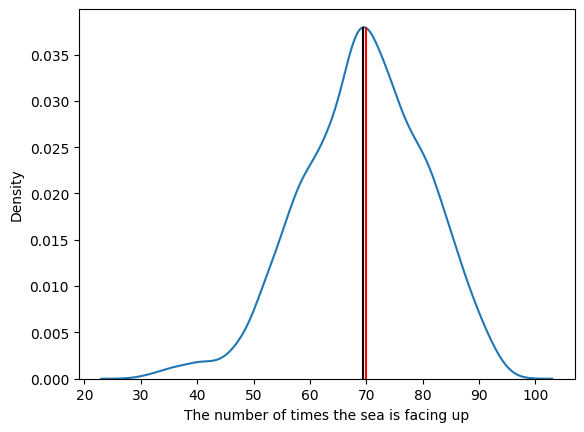

In [56]:
# 绘制预测数据的概率密度图
sns.kdeplot(predictive_data)

# 对比真实数据与预测数据
observed_data = 70
predictive_data_mean = np.mean(predictive_data) 
# 红色竖线为数据真实值
plt.vlines(observed_data,ymin=0,ymax=0.038,color="red")
# 黑色竖线为预测数据的平均值
plt.vlines(predictive_data_mean,ymin=0,ymax=0.038,color="black")
plt.xlabel("The number of times the sea is facing up")

可以看到，数据预测的均值（黑线）与真实数据（红线）非常接近。

总结：
- 了解了贝叶斯公式中分母（边际似然）对于后验的影响
- 通过参数后验分布进行统计推断，包括通过点估计的三种方式与可信区间的两种方式。
- 比较了频率学派置信区间与贝叶斯可信区间的区别
- 通过代码练习如何从后验分布中生成预测数据